# Project objective 

1-Build classification model using Logistic Regression and KNN for diabities dataset and try to predict based on feature if 
  person have diabities or not

2-Try to improve performance with ensemble technique and compare if it work tha base model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('diabetes_with_names.csv') # 0 mean- no and 1 mean yes

In [4]:
data.head()
data.fillna(0,inplace=True)


# Split data in X and Y

In [5]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# Build a model using Logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
log_reg=LogisticRegression()

In [10]:
log_reg.fit(x_train,y_train)

C:\Users\INDRAJEET YADAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\INDRAJEET YADAV\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [11]:
ypred=log_reg.predict(x_test)

In [12]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [13]:
print(accuracy_score(y_test,ypred))
# model is good as 78%

print(classification_report(y_test,ypred))

0.7857142857142857
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



# so our model accuracy is 78% lets creat KNN model and check what happen for same dataset

# KNN-Model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn_model=KNeighborsClassifier(n_neighbors=3)

In [16]:
knn_model.fit(x_train,y_train)

C:\Users\INDRAJEET YADAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(n_neighbors=3)

In [17]:
ypred_knn=knn_model.predict(x_test)

In [18]:
print(accuracy_score(y_test,ypred_knn))

0.7532467532467533


In [19]:
print(classification_report(y_test,ypred_knn))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



# so our accuracy score at this time is 75 % let try to improve model using Bagging

1- Bagging classifier

In [20]:
from sklearn.ensemble import BaggingClassifier

In [21]:
bgcl_log=BaggingClassifier(base_estimator=log_reg,n_estimators=12) # log_reg is the base model applied above and n_estimator 
#you can dicide based on how much leg u want

# if testing score is more than training score that mean model has been overfited

In [22]:
bgcl_log.fit(x_train,y_train)
bgcl_log_ypred=bgcl_log.predict(x_test)

C:\Users\INDRAJEET YADAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\INDRAJEET YADAV\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\INDRAJEET YADAV\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

In [23]:
# print('bgcl Training score',bgcl_log.score(x_train,y_train)) # to check training score 

print('bgcl Testing score',bgcl_log.score(x_test,y_test)) # to check testing score

# as below we can see Training score is 77 and testing score is 79 that is good fit of model


bgcl Testing score 0.7922077922077922


In [24]:
print('BGCL acc',accuracy_score(y_test,bgcl_log_ypred))

BGCL acc 0.7922077922077922


# We find there is no Improvement even using  Ensemble Bagging model on Logistic regression

# Now lets checkout other Ensembling technique if improve our model accuracy or not

Random Forest Ensemble

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf=RandomForestClassifier(n_estimators=8,max_depth=5,max_features=6,random_state=2,verbose=2)

Training and testing

In [27]:
rf.fit(x_train,y_train)

C:\Users\INDRAJEET YADAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished


RandomForestClassifier(max_depth=5, max_features=6, n_estimators=8,
                       random_state=2, verbose=2)

In [28]:
rf_yp=rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


In [29]:
print('Random Forest Accuracy',accuracy_score(rf_yp,y_test))

Random Forest Accuracy 0.7987012987012987


# Now lets check with other method

# Extra Trees Ensemble

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
et=ExtraTreesClassifier(n_estimators=8,max_depth=7,max_features=7,random_state=2,verbose=2)

In [32]:
et.fit(x_train,y_train)

building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


C:\Users\INDRAJEET YADAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


ExtraTreesClassifier(max_depth=7, max_features=7, n_estimators=8,
                     random_state=2, verbose=2)

In [33]:
et_ypred=et.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


In [34]:
print('Extra Trees accuracy',accuracy_score(et_ypred,y_test))

Extra Trees accuracy 0.7857142857142857


# Overfiting & Underfiting

In [35]:
print('Random forest- Training score', rf.score(x_train,y_train))
print('Random forest - Testin score',rf.score(x_test,y_test))

#this is overfited model since Training has 85 score and testing have 79 score,

#reason- Huge variance , lots of outliers in datasets,unbalance dataset



Random forest- Training score 0.8534201954397395
Random forest - Testin score 0.7987012987012987


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


lets check reason

In [36]:
data['Outcome'].value_counts() # see data is not balanced

0    500
1    268
Name: Outcome, dtype: int64

In [37]:
import seaborn as sns

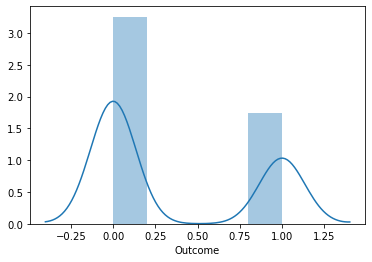

In [38]:
sns.distplot(data['Outcome'])

# BOOSTING

# Ada boost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
ada=AdaBoostClassifier(base_estimator=log_reg,n_estimators=10)

In [51]:
ada.fit(x_train,y_train)
ada_ypred=et.predict(x_test)

C:\Users\INDRAJEET YADAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\INDRAJEET YADAV\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out o

In [53]:
print('ada_score',accuracy_score(y_test,ada_ypred))

print('base_model_score',accuracy_score(y_test,ypred))

ada_score 0.7857142857142857
base_model_score 0.7857142857142857


we can see after multiple uses of boosting and bagging model haa same score this might be due to-

1- High variance in dataset
2- missing datasets or not correct dataset provided

hence before create model we must look inside the dataset atleast variance, distribution of data, missing values,model requirement, overfiting model, underfitting model etc

However model has perform 80% accurate with Random forest Ensemble mehod which is good for satisfaction